In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [2]:
pwd

'/Users/nicholas/PycharmProjects/ga_project4_dsif9/code/03_EDA'

In [3]:
# read data into notebook
df_changi_weather = pd.read_csv('../../assets/cleaned_changi_weather.csv')

In [4]:
df_changi_weather.head(2)

,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),date,week
0,2014,1,1,0.0,0.0,0.0,0.0,26.7,29.0,24.9,10.0,29.9,2014-01-01,1
1,2014,1,2,0.0,0.0,0.0,0.0,27.4,30.9,25.0,11.9,36.0,2014-01-02,1


In [5]:
# check datatypes. In this case, the date has reverted back to an object datatype
df_changi_weather.dtypes

Year                               int64
Month                              int64
Day                                int64
Daily Rainfall Total (mm)        float64
Highest 30 Min Rainfall (mm)     float64
Highest 60 Min Rainfall (mm)     float64
Highest 120 Min Rainfall (mm)    float64
Mean Temperature (°C)            float64
Maximum Temperature (°C)         float64
Minimum Temperature (°C)         float64
Mean Wind Speed (km/h)           float64
Max Wind Speed (km/h)            float64
date                              object
week                               int64
dtype: object

In [6]:
# convert date to datetime format
df_changi_weather['date'] = pd.to_datetime(df_changi_weather['date'])

In [7]:
# confirm changes
df_changi_weather.dtypes

Year                                      int64
Month                                     int64
Day                                       int64
Daily Rainfall Total (mm)               float64
Highest 30 Min Rainfall (mm)            float64
Highest 60 Min Rainfall (mm)            float64
Highest 120 Min Rainfall (mm)           float64
Mean Temperature (°C)                   float64
Maximum Temperature (°C)                float64
Minimum Temperature (°C)                float64
Mean Wind Speed (km/h)                  float64
Max Wind Speed (km/h)                   float64
date                             datetime64[ns]
week                                      int64
dtype: object

# Correlation Heatmap

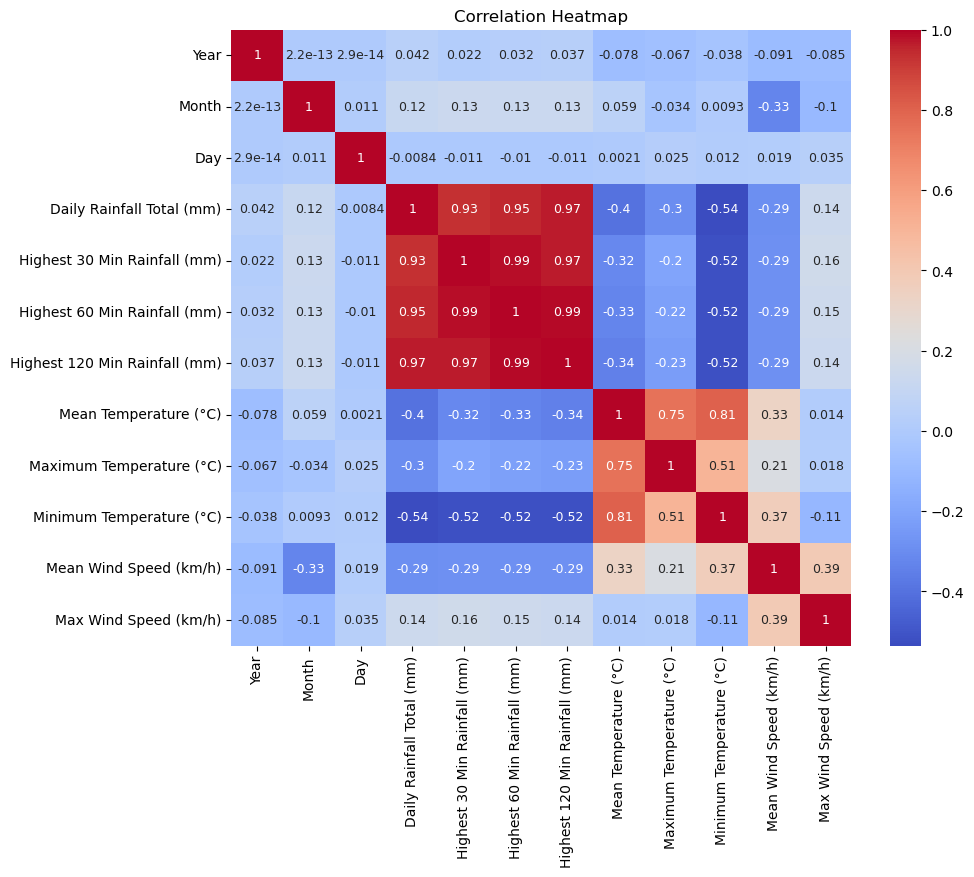

In [8]:
# prepare columns for correlation heatmap plot
corr_columns = ['Year', 'Month', 'Day', 'Daily Rainfall Total (mm)', 'Highest 30 Min Rainfall (mm)', 'Highest 60 Min Rainfall (mm)', 'Highest 120 Min Rainfall (mm)', 'Mean Temperature (°C)', 'Maximum Temperature (°C)', 'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)']
corr_df = df_changi_weather[corr_columns]

# instantiate matrix
corr_matrix = corr_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws={'size': 9})
plt.title('Correlation Heatmap')
plt.show()

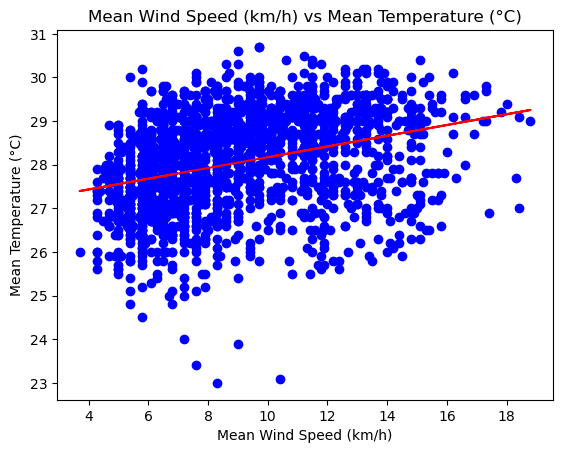

In [9]:
x = df_changi_weather['Mean Wind Speed (km/h)']
y = df_changi_weather['Mean Temperature (°C)']

# slope and interecept for regression line
slope, intercept = np.polyfit(x, y, 1)

plt.scatter(x, y, color='blue')
plt.xlabel('Mean Wind Speed (km/h)')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Wind Speed (km/h) vs Mean Temperature (°C)')

# plot regression line
plt.plot(x, slope * x + intercept, color='r')

plt.show()

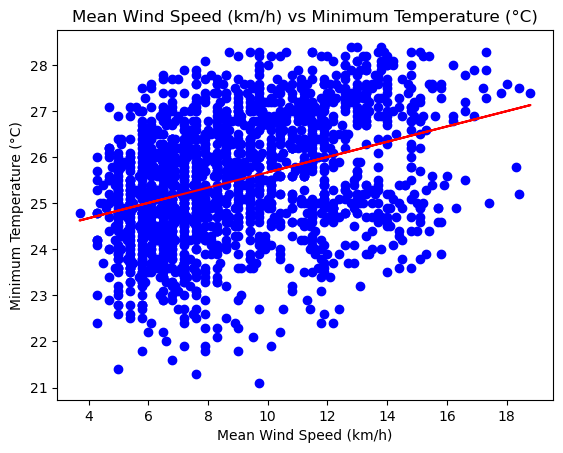

In [10]:
x = df_changi_weather['Mean Wind Speed (km/h)']
y = df_changi_weather['Minimum Temperature (°C)']

# slope and intercept for regression line
slope, intercept = np.polyfit(x, y, 1)

plt.scatter(x, y, color='blue')
plt.xlabel('Mean Wind Speed (km/h)')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Mean Wind Speed (km/h) vs Minimum Temperature (°C)')

# plot regression line
plt.plot(x, slope * x + intercept, color='r')

plt.show()

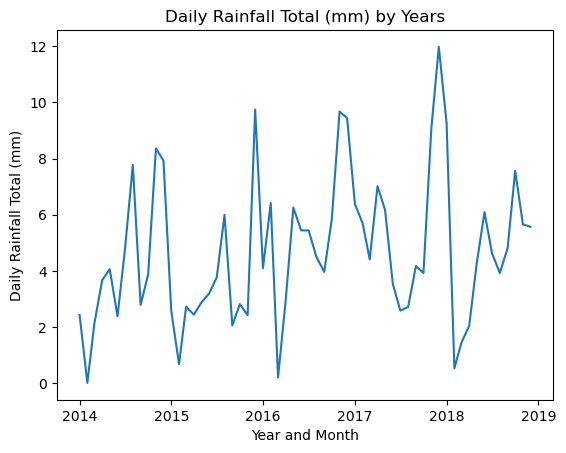

In [11]:
# Group the data by year and month and calculate the mean of daily rainfall total
df_grouped = df_changi_weather.groupby([df_changi_weather['date'].dt.year, df_changi_weather['date'].dt.month])['Daily Rainfall Total (mm)'].mean()

# Convert the index to a MultiIndex object and format the year and month as a string
df_grouped.index = pd.MultiIndex.from_tuples(df_grouped.index, names=['year', 'month'])
df_grouped.index = pd.to_datetime(df_grouped.index.to_series().apply(lambda x: f"{x[0]}-{x[1]}-01"))

# Create a line plot of Daily Rainfall Total by year and month
plt.plot(df_grouped.index, df_grouped)
plt.title('Daily Rainfall Total (mm) by Years')
plt.xlabel('Year and Month')
plt.ylabel('Daily Rainfall Total (mm)')
plt.show()

# Daily Total Rainfall

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_6620/2870453265.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Daily Rainfall Total (mm)', hue='Year', ci=None, data=df_changi_weather)


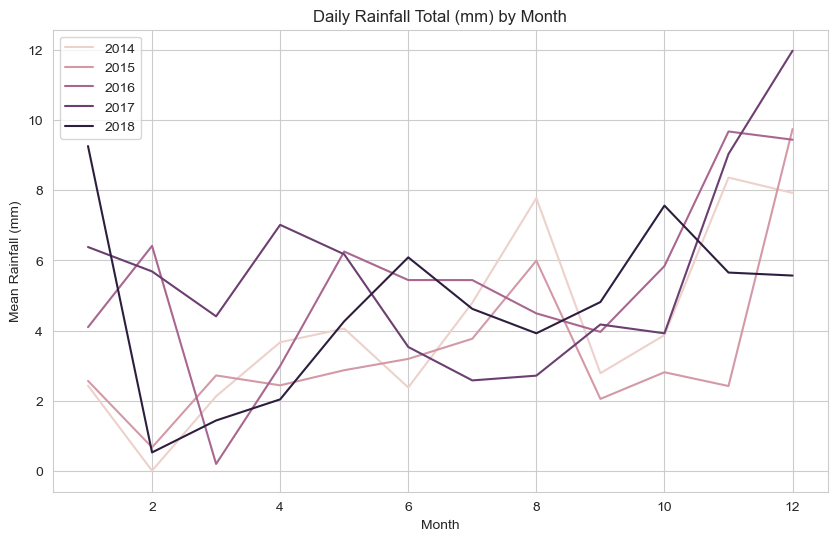

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Daily Rainfall Total (mm)', hue='Year', ci=None, data=df_changi_weather)
plt.title('Daily Rainfall Total (mm) by Month')
plt.xlabel('Month')
plt.ylabel('Mean Rainfall (mm)')
plt.legend(loc='upper left')
plt.show()

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_6620/1668570286.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Daily Rainfall Total (mm)', ci=None, data=df_avg)


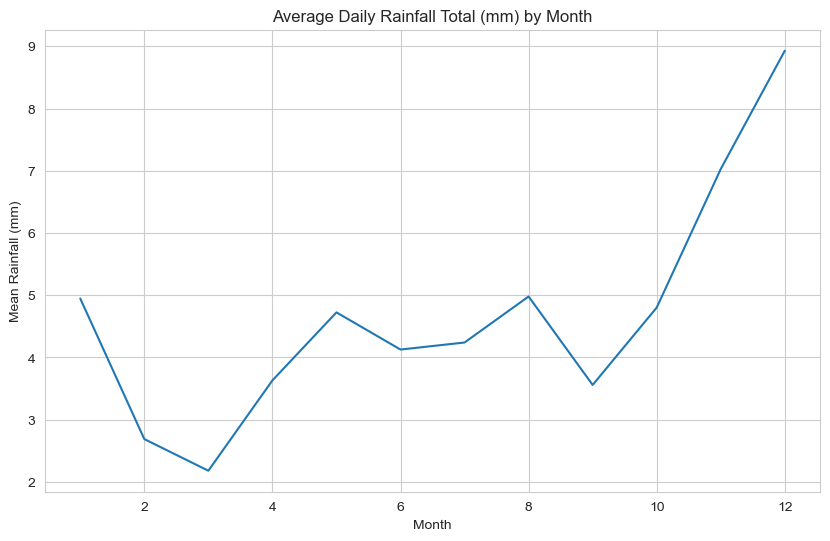

In [13]:
# calculate the mean daily rainfall by month for all years
df_avg = df_changi_weather.groupby('Month')['Daily Rainfall Total (mm)'].mean().reset_index()

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Daily Rainfall Total (mm)', ci=None, data=df_avg)
plt.title('Average Daily Rainfall Total (mm) by Month')
plt.xlabel('Month')
plt.ylabel('Mean Rainfall (mm)')

plt.show()

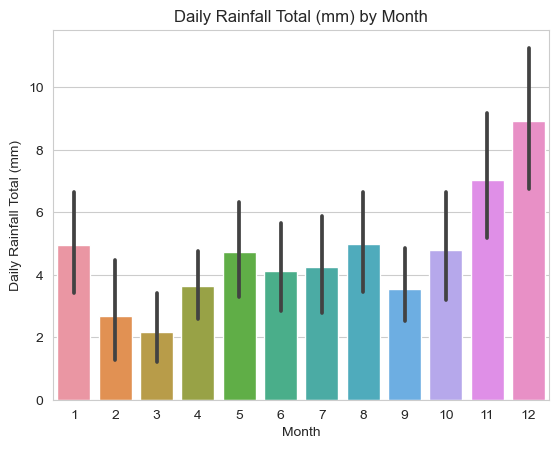

In [14]:
sns.barplot(x='Month', y='Daily Rainfall Total (mm)', data=df_changi_weather)
plt.title('Daily Rainfall Total (mm) by Month')
plt.show()

# Highest 30 Min Rainfall (mm)

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_6620/349933530.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Highest 30 Min Rainfall (mm)', hue='Year', ci=None, data=df_changi_weather)


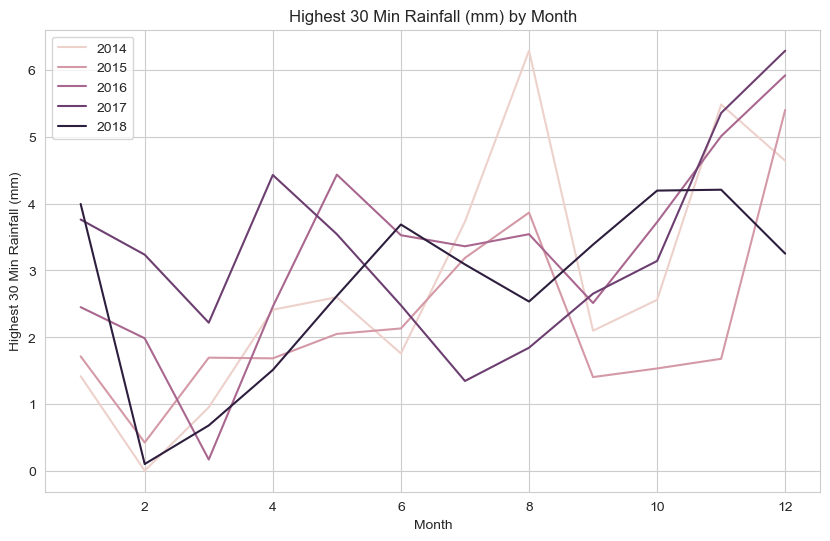

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Highest 30 Min Rainfall (mm)', hue='Year', ci=None, data=df_changi_weather)
plt.title('Highest 30 Min Rainfall (mm) by Month')
plt.xlabel('Month')
plt.ylabel('Highest 30 Min Rainfall (mm)')
plt.legend(loc='upper left')
plt.show()

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_6620/313557658.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Highest 30 Min Rainfall (mm)', ci=None, data=df_avg)


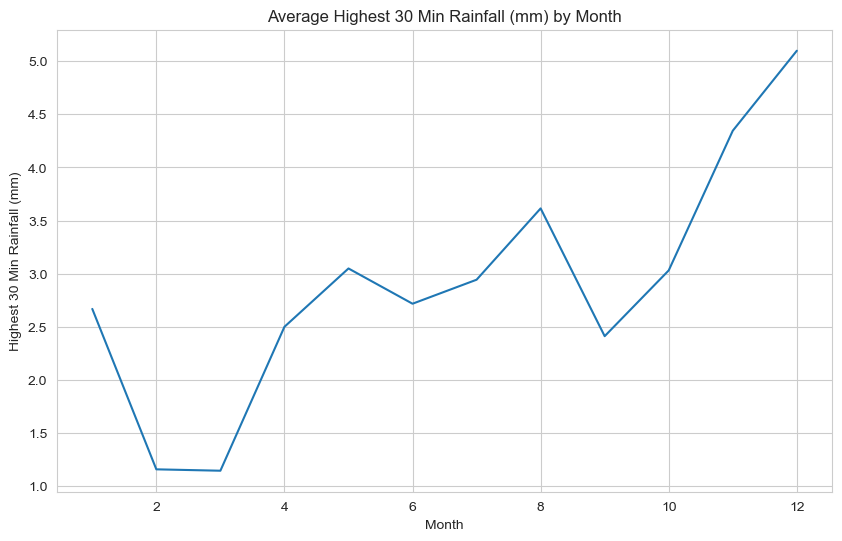

In [16]:
# calculate the mean daily rainfall by month for all years
df_avg = df_changi_weather.groupby('Month')['Highest 30 Min Rainfall (mm)'].mean().reset_index()

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Highest 30 Min Rainfall (mm)', ci=None, data=df_avg)
plt.title('Average Highest 30 Min Rainfall (mm) by Month')
plt.xlabel('Month')
plt.ylabel('Highest 30 Min Rainfall (mm)')

plt.show()

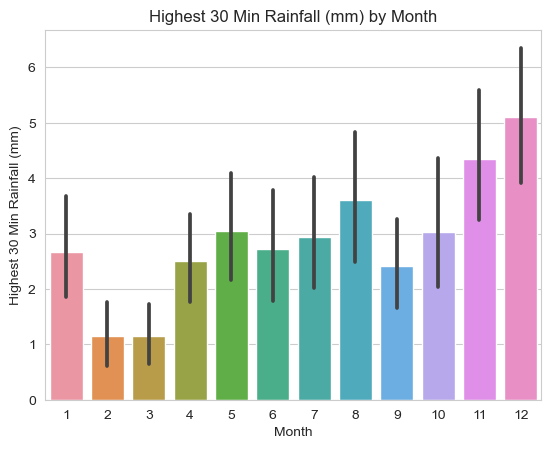

In [17]:
sns.barplot(x='Month', y='Highest 30 Min Rainfall (mm)', data=df_changi_weather)
plt.title('Highest 30 Min Rainfall (mm) by Month')
plt.show()

# Highest 60 min Rainfall (mm) by Month

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_6620/4264999702.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Highest 60 Min Rainfall (mm)', hue='Year', ci=None, data=df_changi_weather)


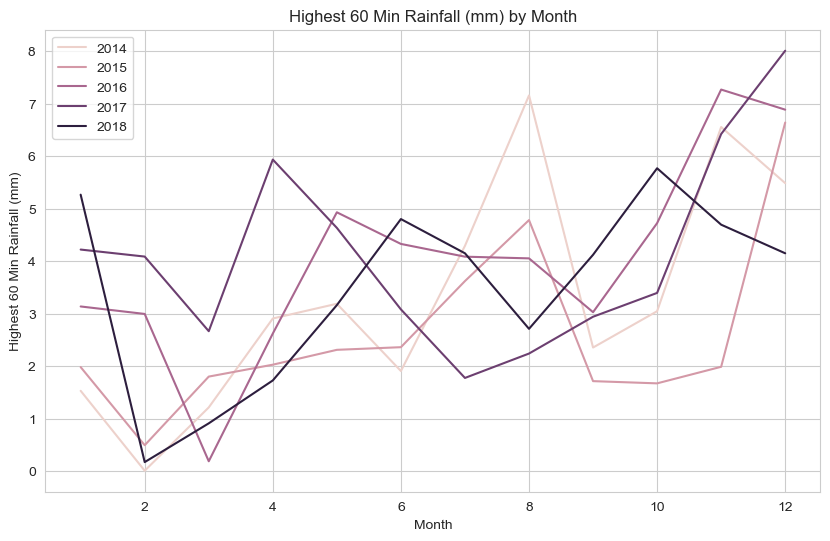

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Highest 60 Min Rainfall (mm)', hue='Year', ci=None, data=df_changi_weather)
plt.title('Highest 60 Min Rainfall (mm) by Month')
plt.xlabel('Month')
plt.ylabel('Highest 60 Min Rainfall (mm)')
plt.legend(loc='upper left')
plt.show()

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_6620/460269358.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Highest 60 Min Rainfall (mm)', ci=None, data=df_avg)


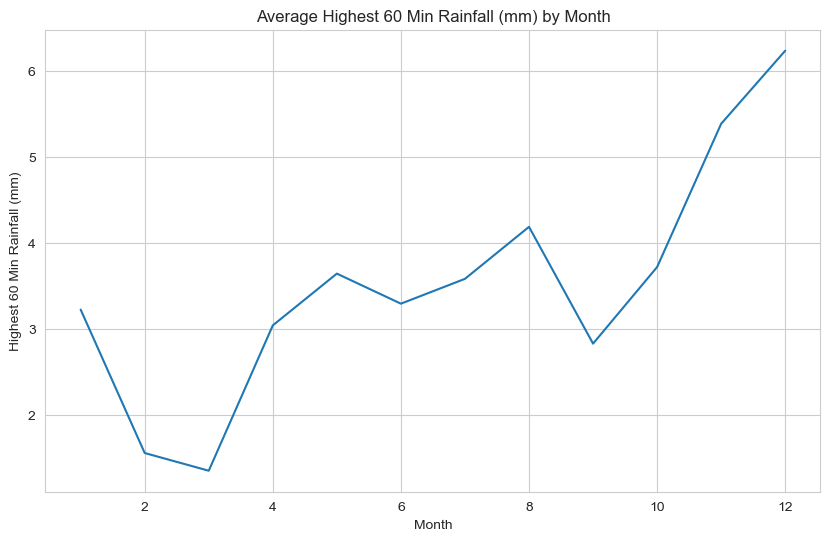

In [19]:
# calculate the mean daily rainfall by month for all years
df_avg = df_changi_weather.groupby('Month')['Highest 60 Min Rainfall (mm)'].mean().reset_index()

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Highest 60 Min Rainfall (mm)', ci=None, data=df_avg)
plt.title('Average Highest 60 Min Rainfall (mm) by Month')
plt.xlabel('Month')
plt.ylabel('Highest 60 Min Rainfall (mm)')

plt.show()

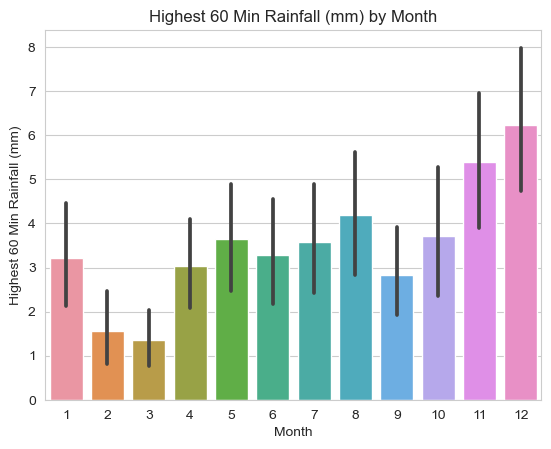

In [20]:
sns.barplot(x='Month', y='Highest 60 Min Rainfall (mm)', data=df_changi_weather)
plt.title('Highest 60 Min Rainfall (mm) by Month')
plt.show()

# Highest 120 Min Rainfall (mm) by Month

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_6620/809071173.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Highest 120 Min Rainfall (mm)', hue='Year', ci=None, data=df_changi_weather)


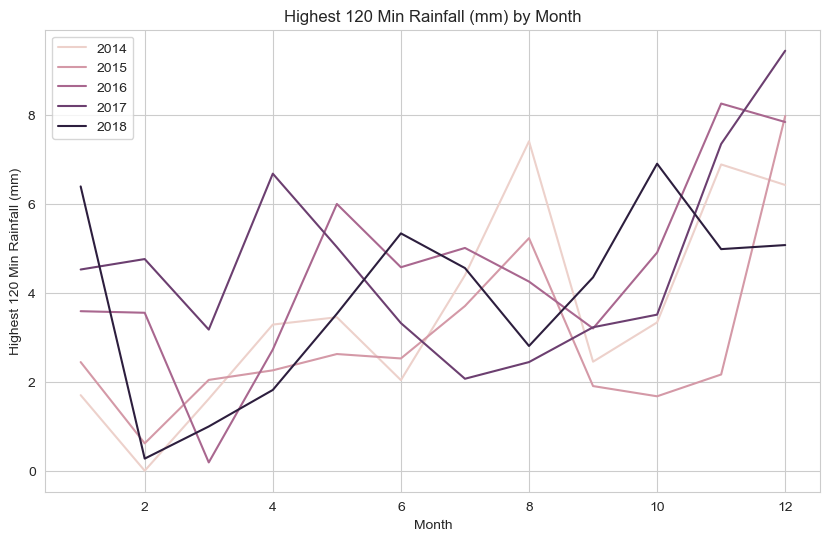

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Highest 120 Min Rainfall (mm)', hue='Year', ci=None, data=df_changi_weather)
plt.title('Highest 120 Min Rainfall (mm) by Month')
plt.xlabel('Month')
plt.ylabel('Highest 120 Min Rainfall (mm)')
plt.legend(loc='upper left')
plt.show()

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_6620/1667799925.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Highest 120 Min Rainfall (mm)', ci=None, data=df_avg)


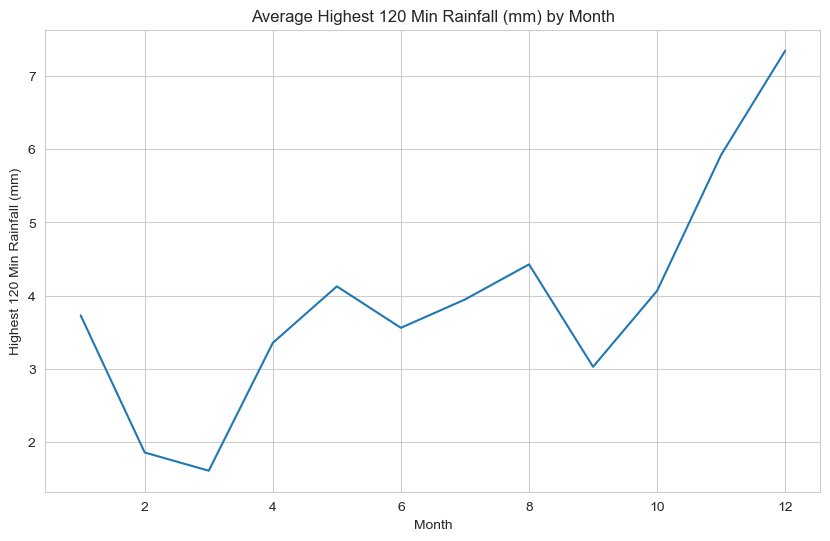

In [22]:
# calculate the mean daily rainfall by month for all years
df_avg = df_changi_weather.groupby('Month')['Highest 120 Min Rainfall (mm)'].mean().reset_index()

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Highest 120 Min Rainfall (mm)', ci=None, data=df_avg)
plt.title('Average Highest 120 Min Rainfall (mm) by Month')
plt.xlabel('Month')
plt.ylabel('Highest 120 Min Rainfall (mm)')

plt.show()

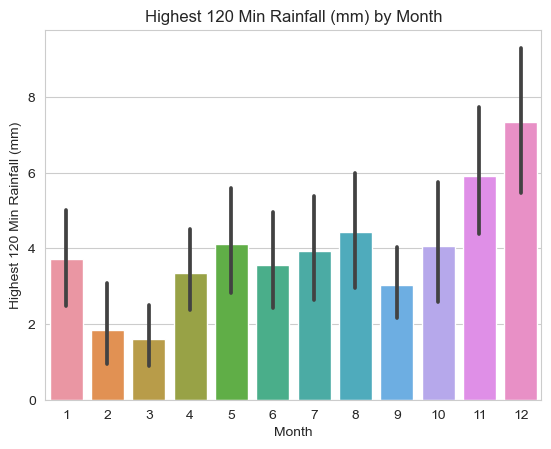

In [23]:
sns.barplot(x='Month', y='Highest 120 Min Rainfall (mm)', data=df_changi_weather)
plt.title('Highest 120 Min Rainfall (mm) by Month')
plt.show()

# Mean Temperature by Month

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_6620/3733051851.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Mean Temperature (°C)', hue='Year', ci=None, data=df_changi_weather)


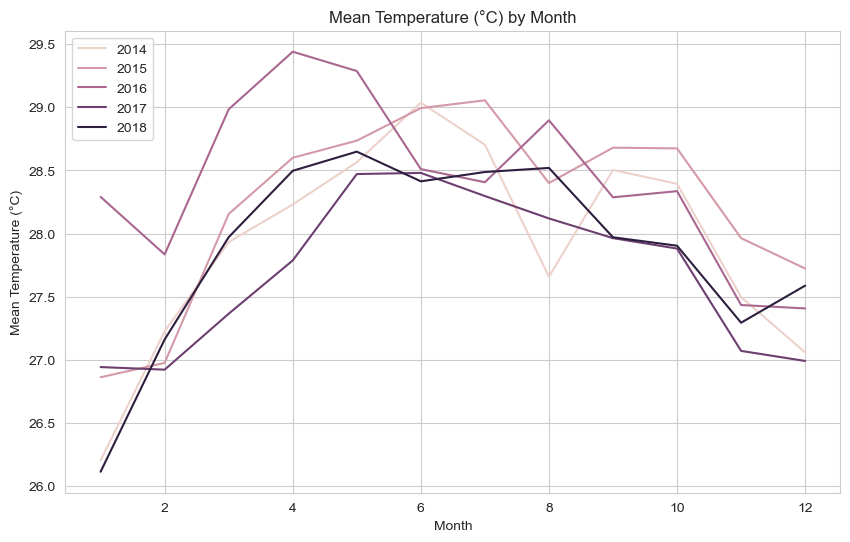

In [24]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Mean Temperature (°C)', hue='Year', ci=None, data=df_changi_weather)
plt.title('Mean Temperature (°C) by Month')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.legend(loc='upper left')
plt.show()

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_6620/947900394.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Mean Temperature (°C)', ci=None, data=df_avg)


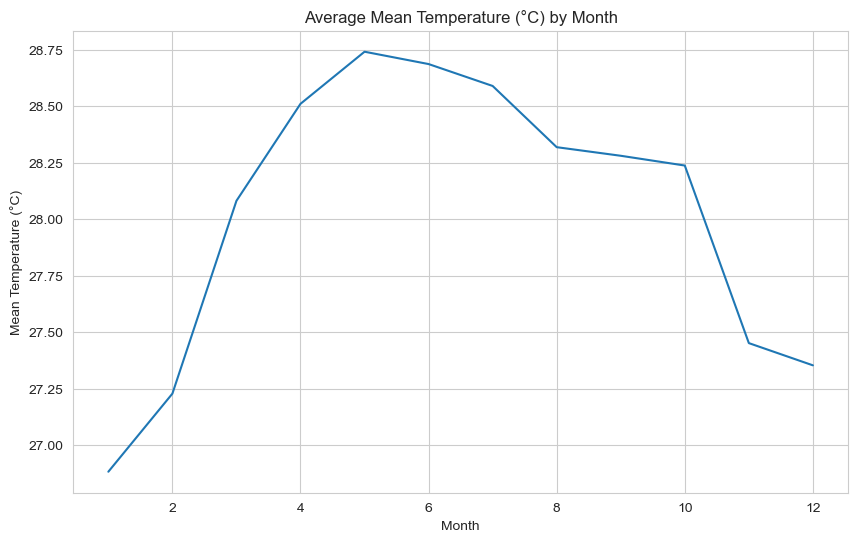

In [25]:
# calculate the mean daily rainfall by month for all years
df_avg = df_changi_weather.groupby('Month')['Mean Temperature (°C)'].mean().reset_index()

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Mean Temperature (°C)', ci=None, data=df_avg)
plt.title('Average Mean Temperature (°C) by Month')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')

plt.show()

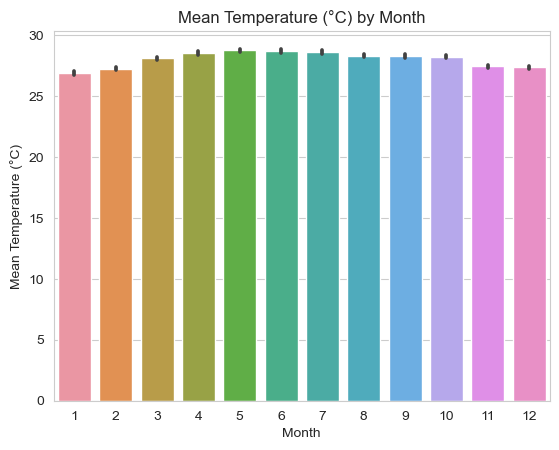

In [26]:
sns.barplot(x='Month', y='Mean Temperature (°C)', data=df_changi_weather)
plt.title('Mean Temperature (°C) by Month')
plt.show()

# Maximum Temperature by Month

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_6620/719929941.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Maximum Temperature (°C)', hue='Year', ci=None, data=df_changi_weather)


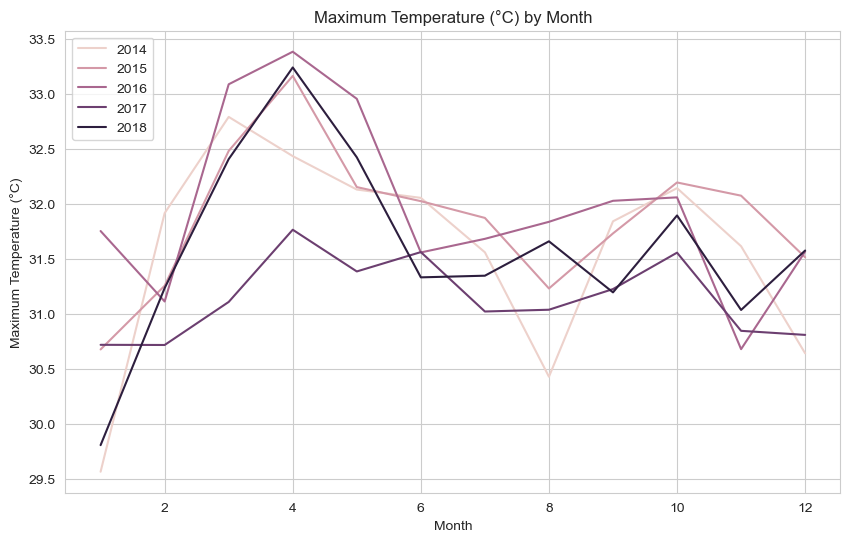

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Maximum Temperature (°C)', hue='Year', ci=None, data=df_changi_weather)
plt.title('Maximum Temperature (°C) by Month')
plt.xlabel('Month')
plt.ylabel('Maximum Temperature (°C)')
plt.legend(loc='upper left')
plt.show()

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_6620/908628172.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Maximum Temperature (°C)', ci=None, data=df_avg)


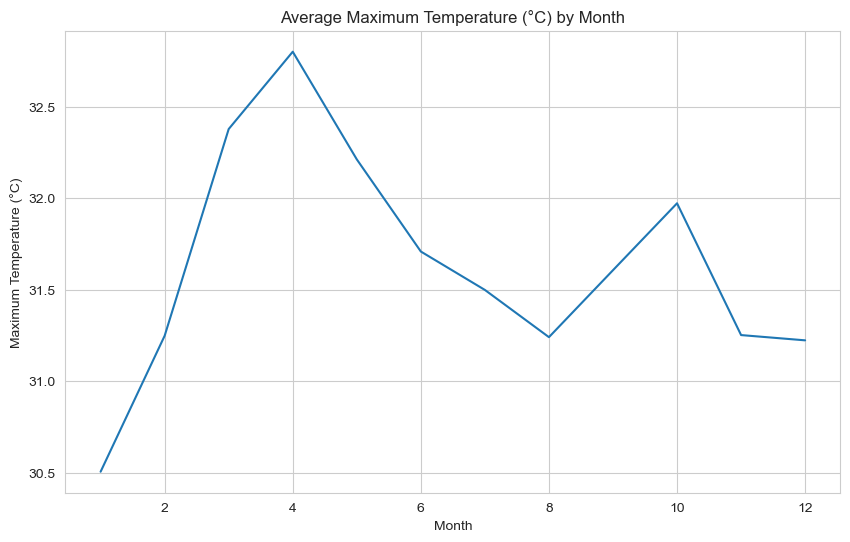

In [28]:
# calculate the mean daily rainfall by month for all years
df_avg = df_changi_weather.groupby('Month')['Maximum Temperature (°C)'].mean().reset_index()

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Maximum Temperature (°C)', ci=None, data=df_avg)
plt.title('Average Maximum Temperature (°C) by Month')
plt.xlabel('Month')
plt.ylabel('Maximum Temperature (°C)')

plt.show()

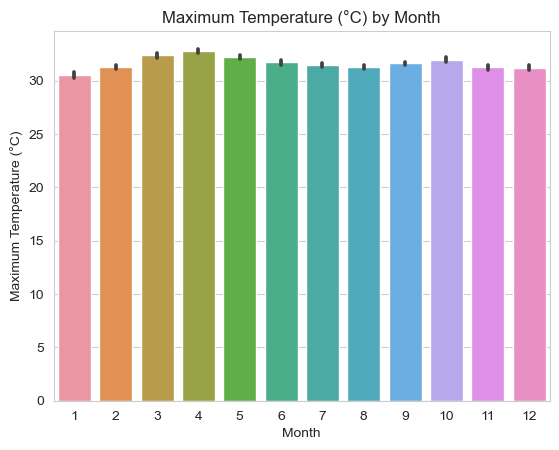

In [29]:
sns.barplot(x='Month', y='Maximum Temperature (°C)', data=df_changi_weather)
plt.title('Maximum Temperature (°C) by Month')
plt.show()

# Minimum Temperature by Month

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_6620/2942983612.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Minimum Temperature (°C)', hue='Year', ci=None, data=df_changi_weather)


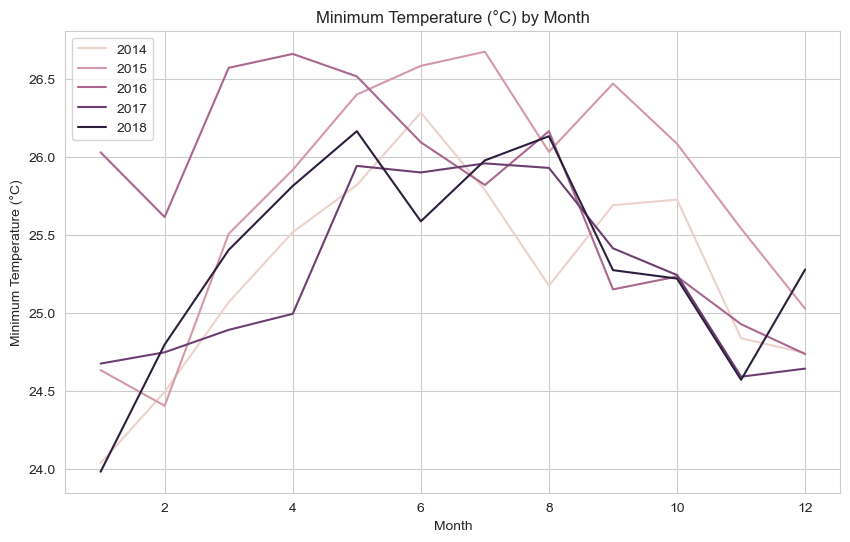

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Minimum Temperature (°C)', hue='Year', ci=None, data=df_changi_weather)
plt.title('Minimum Temperature (°C) by Month')
plt.xlabel('Month')
plt.ylabel('Minimum Temperature (°C)')
plt.legend(loc='upper left')
plt.show()

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_6620/3642559861.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Minimum Temperature (°C)', ci=None, data=df_avg)


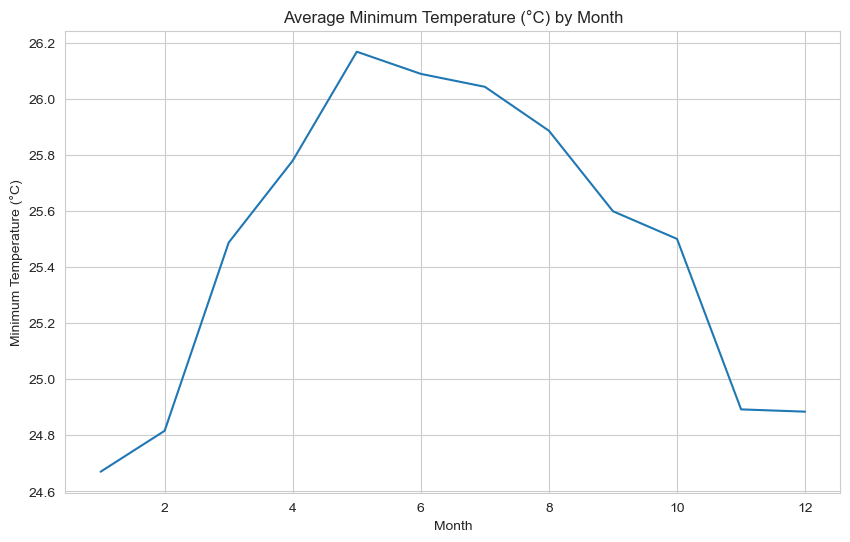

In [31]:
# calculate the mean daily rainfall by month for all years
df_avg = df_changi_weather.groupby('Month')['Minimum Temperature (°C)'].mean().reset_index()

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Minimum Temperature (°C)', ci=None, data=df_avg)
plt.title('Average Minimum Temperature (°C) by Month')
plt.xlabel('Month')
plt.ylabel('Minimum Temperature (°C)')

plt.show()

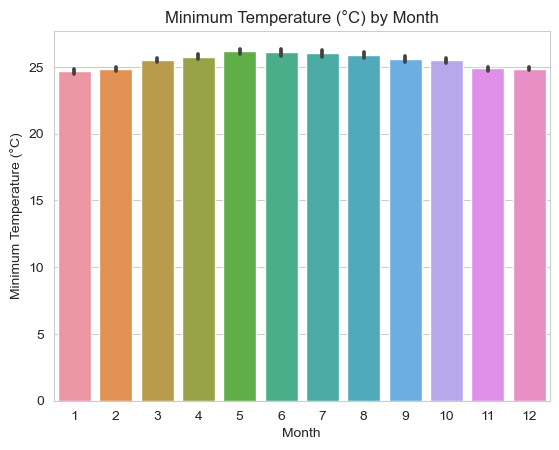

In [32]:
sns.barplot(x='Month', y='Minimum Temperature (°C)', data=df_changi_weather)
plt.title('Minimum Temperature (°C) by Month')
plt.show()

# Mean Wind Speed by Month

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_6620/2998895242.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Mean Wind Speed (km/h)', hue='Year', ci=None, data=df_changi_weather)


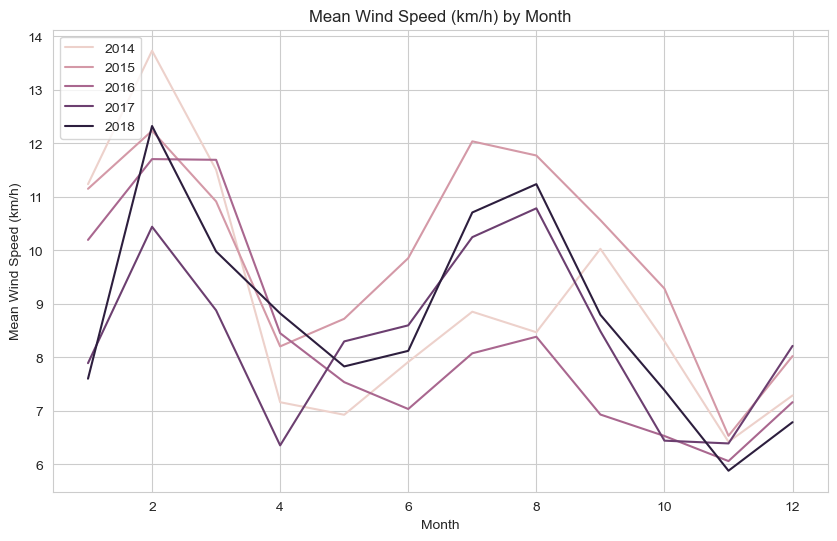

In [33]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Mean Wind Speed (km/h)', hue='Year', ci=None, data=df_changi_weather)
plt.title('Mean Wind Speed (km/h) by Month')
plt.xlabel('Month')
plt.ylabel('Mean Wind Speed (km/h)')
plt.legend(loc='upper left')
plt.show()

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_6620/3833127266.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Mean Wind Speed (km/h)', ci=None, data=df_avg)


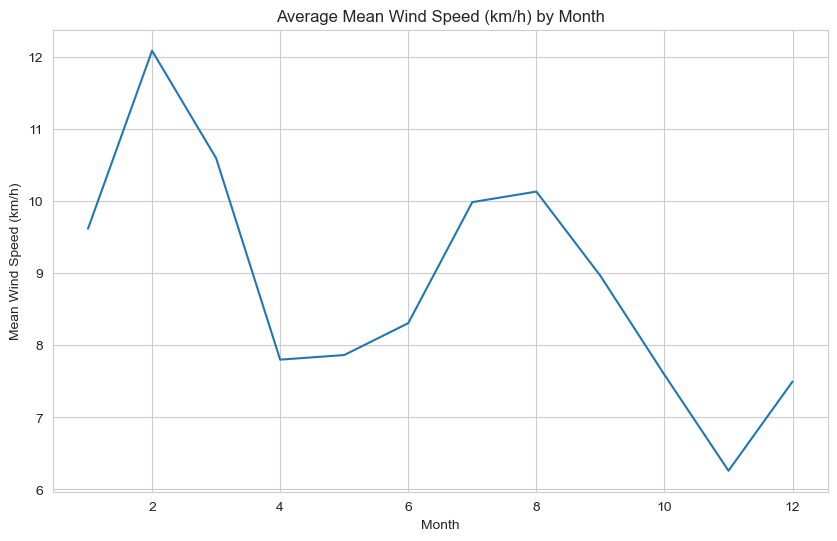

In [34]:
# calculate the mean daily rainfall by month for all years
df_avg = df_changi_weather.groupby('Month')['Mean Wind Speed (km/h)'].mean().reset_index()

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Mean Wind Speed (km/h)', ci=None, data=df_avg)
plt.title('Average Mean Wind Speed (km/h) by Month')
plt.xlabel('Month')
plt.ylabel('Mean Wind Speed (km/h)')

plt.show()

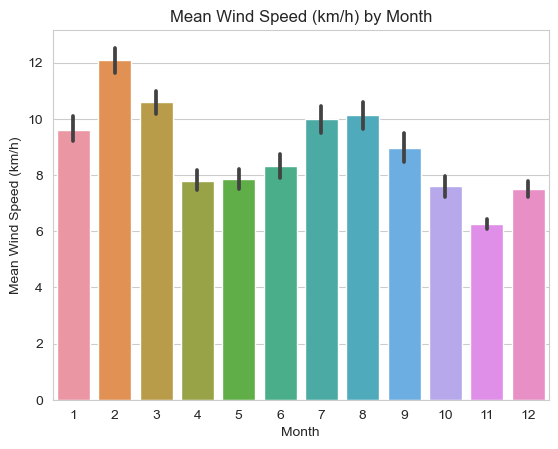

In [35]:
sns.barplot(x='Month', y='Mean Wind Speed (km/h)', data=df_changi_weather)
plt.title('Mean Wind Speed (km/h) by Month')
plt.show()

# Max Wind Speed by Month

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_6620/1056707738.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Max Wind Speed (km/h)', hue='Year', ci=None, data=df_changi_weather)


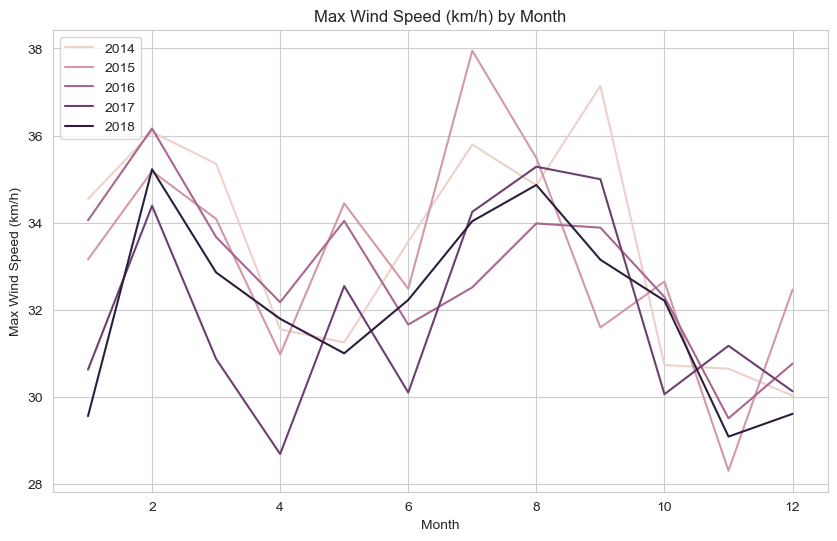

In [36]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Max Wind Speed (km/h)', hue='Year', ci=None, data=df_changi_weather)
plt.title('Max Wind Speed (km/h) by Month')
plt.xlabel('Month')
plt.ylabel('Max Wind Speed (km/h)')
plt.legend(loc='upper left')
plt.show()

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_6620/1591582208.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Max Wind Speed (km/h)', ci=None, data=df_avg)


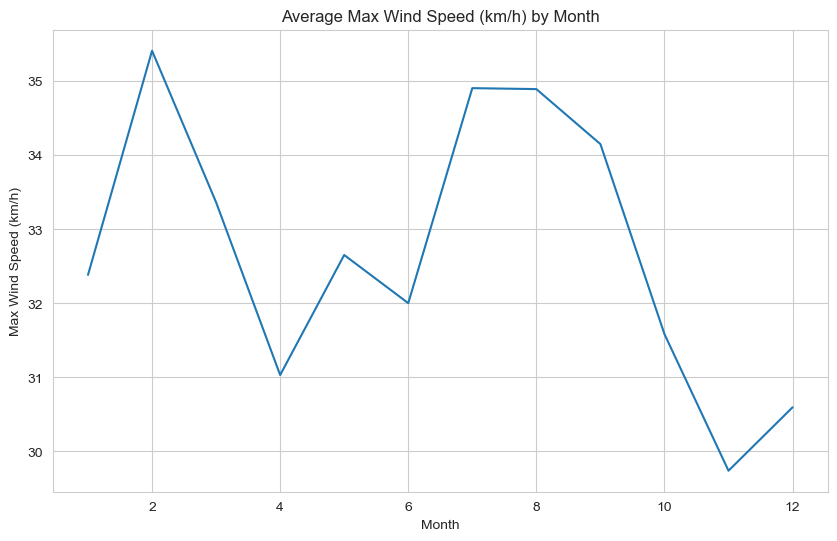

In [37]:
# calculate the mean daily rainfall by month for all years
df_avg = df_changi_weather.groupby('Month')['Max Wind Speed (km/h)'].mean().reset_index()

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Max Wind Speed (km/h)', ci=None, data=df_avg)
plt.title('Average Max Wind Speed (km/h) by Month')
plt.xlabel('Month')
plt.ylabel('Max Wind Speed (km/h)')

plt.show()

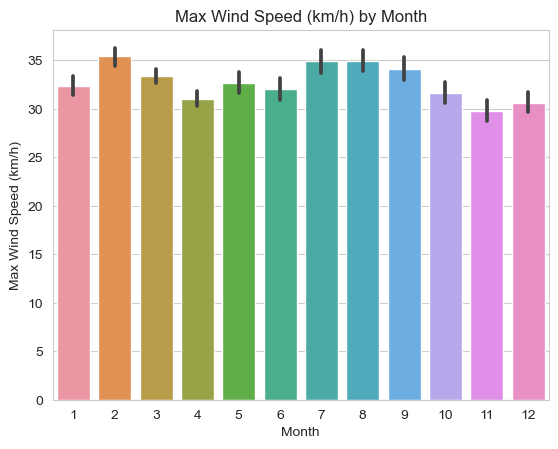

In [38]:
sns.barplot(x='Month', y='Max Wind Speed (km/h)', data=df_changi_weather)
plt.title('Max Wind Speed (km/h) by Month')
plt.show()

# Max and Min Temperature by Month

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_6620/3039502982.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Maximum Temperature (°C)', ci=None, data=df_max, label='Maximum Temperature')
/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_6620/3039502982.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Minimum Temperature (°C)', ci=None, data=df_min, label='Minimum Temperature')


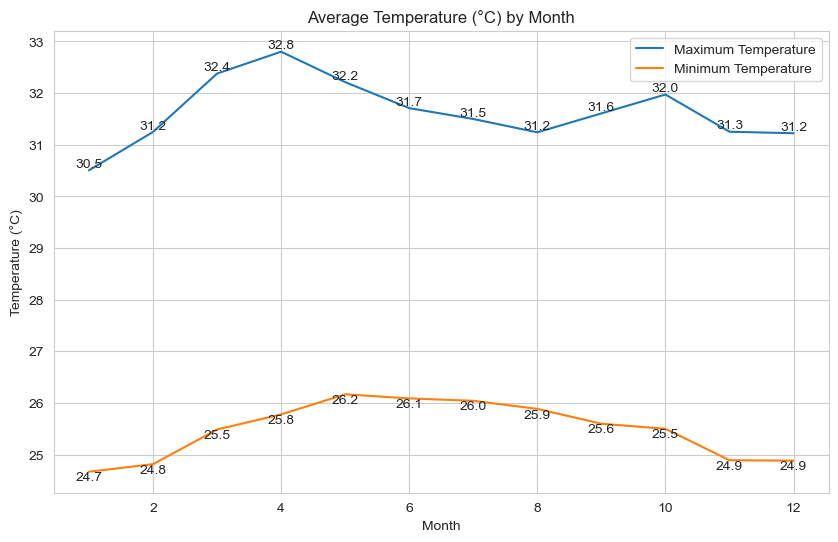

In [39]:
# calculate the mean daily maximum temperature by month for all years
df_max = df_changi_weather.groupby('Month')['Maximum Temperature (°C)'].mean().reset_index()

# calculate the mean daily minimum temperature by month for all years
df_min = df_changi_weather.groupby('Month')['Minimum Temperature (°C)'].mean().reset_index()

# create a line plot of the average daily maximum and minimum temperature by month
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

sns.lineplot(x='Month', y='Maximum Temperature (°C)', ci=None, data=df_max, label='Maximum Temperature')
sns.lineplot(x='Month', y='Minimum Temperature (°C)', ci=None, data=df_min, label='Minimum Temperature')

plt.title('Average Temperature (°C) by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

# display data values for each point
for i in range(len(df_max)):
    plt.text(df_max['Month'][i], df_max['Maximum Temperature (°C)'][i], round(df_max['Maximum Temperature (°C)'][i], 1), ha='center', va='bottom')
    plt.text(df_min['Month'][i], df_min['Minimum Temperature (°C)'][i], round(df_min['Minimum Temperature (°C)'][i], 1), ha='center', va='top')

plt.show()

In [40]:
# read data into notebook
df_dengue = pd.read_csv('../../assets/cleaned_dengue.csv')

In [41]:
df_dengue.head()

,type_dengue,date,year,month,number
0,Dengue,2014-01-06,2014,1,436.0
1,DHF,2014-01-06,2014,1,1.0
2,Dengue,2014-01-13,2014,1,479.0
3,DHF,2014-01-13,2014,1,0.0
4,Dengue,2014-01-20,2014,1,401.0


In [42]:
# convert date to datetime format
df_dengue['date'] = pd.to_datetime(df_dengue['date'])

In [43]:
merged_df = pd.merge(df_dengue, df_changi_weather, on='date')

In [44]:
merged_df.isnull().sum()

type_dengue                      0
date                             0
year                             0
month                            0
number                           0
Year                             0
Month                            0
Day                              0
Daily Rainfall Total (mm)        0
Highest 30 Min Rainfall (mm)     0
Highest 60 Min Rainfall (mm)     0
Highest 120 Min Rainfall (mm)    0
Mean Temperature (°C)            0
Maximum Temperature (°C)         0
Minimum Temperature (°C)         0
Mean Wind Speed (km/h)           0
Max Wind Speed (km/h)            0
week                             0
dtype: int64

/var/folders/90/274n3kt55bl4fjg8t134196r0000gn/T/ipykernel_6620/3416624781.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df.corr()


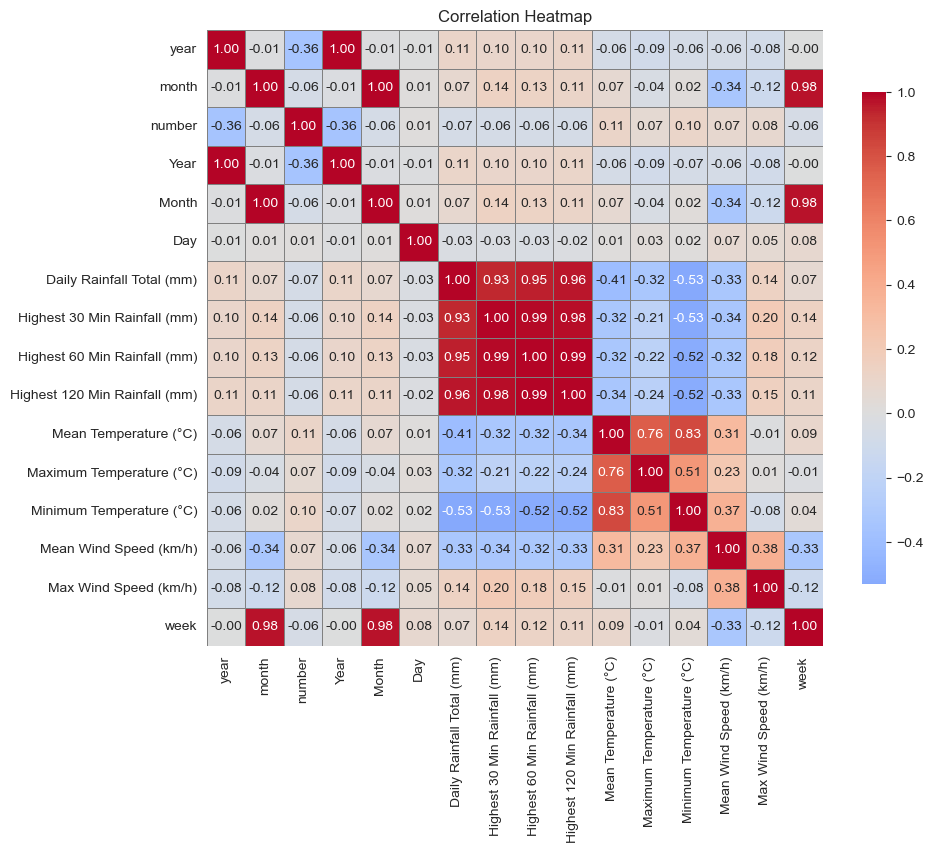

In [45]:
corr_matrix = merged_df.corr()

# create the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f',
            linewidths=0.5, linecolor='gray', square=True, 
            cbar_kws={'shrink': 0.8})

# set the title
plt.title('Correlation Heatmap')

# show the plot
plt.show()

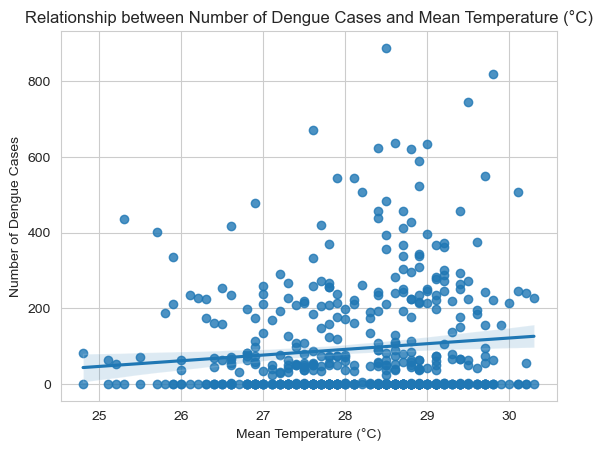

In [46]:
sns.set_style('whitegrid')

# create the scatterplot with a regression line
sns.regplot(data=merged_df, x='Mean Temperature (°C)', y='number')

# set the title and axis labels
plt.title('Relationship between Number of Dengue Cases and Mean Temperature (°C)')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Number of Dengue Cases')

# show the plot
plt.show()

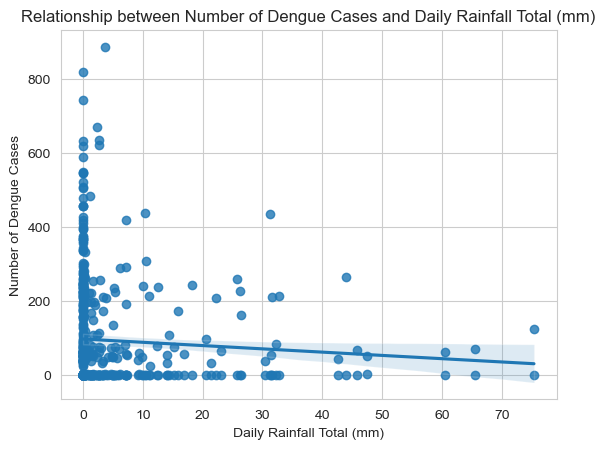

In [47]:
sns.set_style('whitegrid')

# create the scatterplot with a regression line
sns.regplot(data=merged_df, x='Daily Rainfall Total (mm)', y='number')

# set the title and axis labels
plt.title('Relationship between Number of Dengue Cases and Daily Rainfall Total (mm)')
plt.xlabel('Daily Rainfall Total (mm)')
plt.ylabel('Number of Dengue Cases')

# show the plot
plt.show()

In [48]:
# export cleaned dataframe
merged_df.to_csv('../../assets/cleaned_comb_changi_weather.csv', index=False)